## The goal of collecting this dataset:
The goal of collecting the Student Stress Factors dataset is to conduct a comprehensive analysis of the factors contributing to student stress, with a focus on classifying students into different stress levels and clustering them based on common stress-related characteristics. By examining variables such as academic workload, personal life, social pressures, and mental health, this dataset aims to identify patterns and relationships that can classify students’ stress levels. Additionally, clustering techniques will be used to group students with similar stress profiles, which can provide insights for developing targeted strategies to reduce stress, improve well-being, and enhance academic performance.

## The source of the dataset:
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

In [75]:
import pandas as pd
df = pd.read_csv('Dataset/StressLevelDataset(in).csv')

## General information about the dataset:
Number of attributes: 21
Number of objects: 1100
Attribute types: All columns are integer types (int64)
## General information about the dataset:
Number of attributes: 21

Number of objects: 1100

Attribute types: All columns are integer types (int64)

Class label: stress_level

In [76]:
import pandas as pd
df = pd.read_csv('Dataset/StressLevelDataset(in).csv')
num_objects = len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})
print("Number of attributes:" ,len(df.columns))
print()
print("Attributes and their types:")
print(attributes_info)
print()
print("Number of objects: ",num_objects)

Number of attributes: 21

Attributes and their types:
                  Attribute Name Data Type
0                  anxiety_level     int64
1                    self_esteem     int64
2          mental_health_history     int64
3                     depression     int64
4                       headache     int64
5                 blood_pressure     int64
6                  sleep_quality     int64
7              breathing_problem     int64
8                    noise_level     int64
9              living_conditions     int64
10                        safety     int64
11                   basic_needs     int64
12          academic_performance     int64
13                    study_load     int64
14  teacher_student_relationship     int64
15        future_career_concerns     int64
16                social_support     int64
17                 peer_pressure     int64
18    extracurricular_activities     int64
19                      bullying     int64
20                  stress_level     int64


#### Check the Current Distribution of the Class Label:


In [77]:
# Check the current distribution of the class label

# Use value_counts to get the count of each unique value in the 'stress_level' column
# Set normalize=True to get the relative frequencies as percentages, multiplied by 100
class_distribution = df['stress_level'].value_counts(normalize=True) * 100
print("Class label distribution in the full dataset:") # Print a message to describe the output
print(class_distribution) # Display the distribution of the class labels in percentages

Class label distribution in the full dataset:
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


### Graphs:


#### Bar char:

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


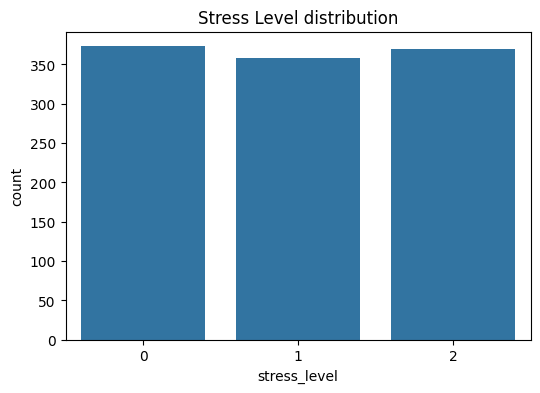

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the class distribution (counts of each class label)
print(class_distribution)
plt.figure(figsize=(6, 4)) # Set up the figure size for the plot
sns.countplot(x='stress_level', data=df) # Use Seaborn's countplot to plot the distribution of the 'stress_level' column
plt.title('Stress Level distribution') # Set the title of the plot
plt.show() # Display the plot

This bar chart shows that the dataset contains equal amounts of data for each stress level, which helps avoid issues related to class imbalance that can skew analysis or model predictions. In this dataset, stress levels are represented numerically, with 0 indicating low stress, 1 representing medium stress, and 2 indicating high stress. Balanced data like this ensures that predictive models won't favor one category over another, resulting in more reliable and fair predictions across all stress levels. Without this balance, a model might incorrectly favor more common categories, such as "low stress," leading to biased outcomes.

#### Pie chart:

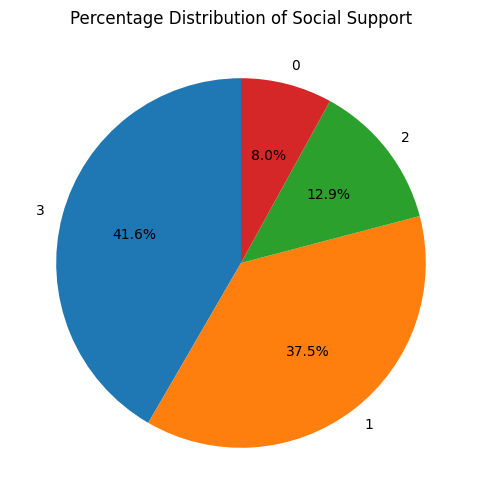

In [79]:
data2 = df['social_support'].value_counts(normalize=True) * 100 # Calculate the percentage distribution of the 'social_support' column
data2.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90) # Plot the percentage distribution as a pie chart
plt.title('Percentage Distribution of Social Support') # Set the title of the pie chart
plt.ylabel('') # Remove the y-axis label for a cleaner pie chart presentation
plt.show() # Display the pie chart

The pie chart reveals that the majority of people (over 70%) have either low or high levels of social support, with the largest percentage (41.6%) feeling well-supported. However, around 8% of the population experiences no support, which could be an area of concern. Understanding these different levels of support helps in targeting social or health interventions to the right groups.

#### Box plot:

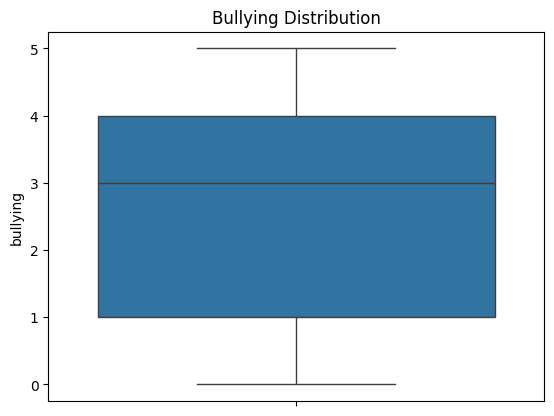

In [80]:
# Create a box plot for the 'bullying' column in the dataset
sns.boxplot(data=df['bullying'])
plt.title('Bullying Distribution') # Set the title for the plot
plt.show() # Display the plot

The box plot displayed shows the distribution of the "bullying" variable in the dataset. The box represents the interquartile range (IQR), with the lower and upper edges corresponding to the 25th and 75th percentiles. The median bullying level is approximately 3, as indicated by the horizontal line within the box. The whiskers extend to the minimum and maximum values in the dataset, showing that most data points fall between 1 and 5, without any significant outliers. This distribution gives a clear view of how bullying incidents are spread across the population.

### Missing values:

In [81]:
# Check for missing values
missing_values = df.isnull().sum() # This creates a Series containing the count of missing values per column
print("Missing values per column:") # Print a message indicating that missing values will be displayed
print(missing_values) # Print missing values per column

Missing values per column:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


### Statistical summaries:

In [82]:
# Calculate statistical summaries (mean, variance, etc.)
stat_summary = df.describe().T  # Transpose the summary for better readability
stat_summary['variance'] = df.var() # Calculate variance for each column and add it to the statistical summary
print(stat_summary[['mean', 'std', 'variance']]) # Display the statistical summary including mean, standard deviation, and variance

                                   mean       std   variance
anxiety_level                 11.063636  6.117558  37.424518
self_esteem                   17.777273  8.944599  80.005852
mental_health_history          0.492727  0.500175   0.250175
depression                    12.555455  7.727008  59.706658
headache                       2.508182  1.409356   1.986284
blood_pressure                 2.181818  0.833575   0.694847
sleep_quality                  2.660000  1.548383   2.397489
breathing_problem              2.753636  1.400713   1.961998
noise_level                    2.649091  1.328127   1.763921
living_conditions              2.518182  1.119208   1.252626
safety                         2.737273  1.406171   1.977317
basic_needs                    2.772727  1.433761   2.055670
academic_performance           2.772727  1.414594   2.001075
study_load                     2.621818  1.315781   1.731280
teacher_student_relationship   2.648182  1.384579   1.917058
future_career_concerns  

In [83]:
# Handling Duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Remove duplicates and save the cleaned dataset
data = df.drop_duplicates()

# Save after handling duplicates
data.to_csv('Cleaned_Dataset.csv', index=False)

Number of duplicate rows: 0


In [84]:
data1 = pd.read_csv('Cleaned_Dataset.csv')
import numpy as np

# Outlier handling using IQR method
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

# Select numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Detect outliers in each numeric column
outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

# Print outlier summary
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
anxiety_level: 0 rows with outliers
self_esteem: 0 rows with outliers
mental_health_history: 0 rows with outliers
depression: 0 rows with outliers
headache: 0 rows with outliers
blood_pressure: 0 rows with outliers
sleep_quality: 0 rows with outliers
breathing_problem: 0 rows with outliers
noise_level: 173 rows with outliers
living_conditions: 62 rows with outliers
safety: 0 rows with outliers
basic_needs: 0 rows with outliers
academic_performance: 0 rows with outliers
study_load: 165 rows with outliers
teacher_student_relationship: 0 rows with outliers
future_career_concerns: 0 rows with outliers
social_support: 0 rows with outliers
peer_pressure: 0 rows with outliers
extracurricular_activities: 0 rows with outliers
bullying: 0 rows with outliers
stress_level: 0 rows with outliers
Total Rows with Outliers: 400


In [85]:
data1 = pd.read_csv('Cleaned_Dataset.csv')
data1 = pd.DataFrame(data1)
# Columns to normalize
columns_to_normalize = [
    'anxiety_level', 'self_esteem', 'depression', 'blood_pressure', 
    'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 
    'study_load', 'future_career_concerns', 'social_support', 'peer_pressure', 
    'extracurricular_activities', 'bullying', 'stress_level'
]

# Apply Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = data1[column].abs().max()
    data1[column] = data1[column] / (10 ** len(str(int(max_abs_value))))

# Output the normalized data
print(data1.head())

# Save the normalized dataset
data1.to_csv('Cleaned_Dataset.csv', index=False)

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           0.14         0.20                      0        0.11         2   
1           0.15         0.08                      1        0.15         5   
2           0.12         0.18                      1        0.14         2   
3           0.16         0.12                      1        0.15         4   
4           0.16         0.28                      0        0.07         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.1            0.2                0.4          0.2   
1             0.3            0.1                0.4          0.3   
2             0.1            0.2                0.2          0.2   
3             0.3            0.1                0.3          0.4   
4             0.3            0.5                0.1          0.3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                0.3  ...            2        

In [86]:
data1 = pd.read_csv('Cleaned_Dataset.csv')
# Step 5: Aggregation based on stress_level
aggregated_df = data1.groupby('stress_level').agg({
    'anxiety_level': 'mean',  
    'depression': 'mean',    
    'self_esteem': 'mean',    
    'bullying': 'sum'  # Example of sum for categorical variables
})



# Output aggregated data
print("Aggregated data:")
print(aggregated_df)

Aggregated data:
              anxiety_level  depression  self_esteem  bullying
stress_level                                                  
0.0                0.054316    0.060134     0.252520      46.8
0.1                0.114302    0.118743     0.192626      91.5
0.2                0.164011    0.198293     0.087805     149.6


In [87]:
# Load the dataset
data1 = pd.read_csv('Cleaned_Dataset.csv')


# Discretization of anxiety_level into categories
data1['anxiety_level_binned'] = pd.cut(data1['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])

# Save the discretized dataset
data1.to_csv('Cleaned_Dataset.csv', index=False)

# Display the first few rows
print("Data after discretization:")
print(data1[['anxiety_level', 'anxiety_level_binned']].head())

Data after discretization:
   anxiety_level anxiety_level_binned
0           0.14                 High
1           0.15                 High
2           0.12               Medium
3           0.16                 High
4           0.16                 High


# Feature Selection
The number of available features is 20, and the feature selection includes blood pressure, sleep quality, future career concerns, bullying, and stress level.
 

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Load the dataset
df = pd.read_csv('Cleaned_StressLevelDataset.csv')

# Separate features from the target variable
X = df.drop(columns=['anxiety_level', 'anxiety_level_binned'])  # Exclude non-numeric columns
y = df['anxiety_level']

# Select only numeric columns for feature selection
X_numeric = X.select_dtypes(include=[float, int])

# Check the number of features
n_features = X_numeric.shape[1]
print('Number of features available:', n_features)

# Specify the number of features to choose
num_features_to_select = min(5, n_features)  # Choose the least between 5 and the actual number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Apply feature selection
X_selected = selector.fit_transform(X_numeric, y)

# Get selected feature indicators
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X_numeric.columns[selected_indices]

print('Selected Features:', selected_features)

Number of features available: 20
Selected Features: Index(['blood_pressure', 'sleep_quality', 'future_career_concerns', 'bullying',
       'stress_level'],
      dtype='object')


In [89]:
df['anxiety_level_binned'] = pd.cut(df['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])
print("Data after discretization:")
print(df[['anxiety_level', 'anxiety_level_binned']].head())

Data after discretization:
   anxiety_level anxiety_level_binned
0           0.14                 High
1           0.15                 High
2           0.12               Medium
3           0.16                 High
4           0.16                 High


In [90]:
#correlation_matrix = df.corr()
##correlation_with_target = correlation_matrix['stress_level'].sort_values(ascending=False)
#print("Correlation coefficients with stress_level:")
##print(correlation_with_target)
#from sklearn.feature_selection import SelectKBest, f_classif